# Graduate Admission

The dataset is suitable for prediction of Graduate Admission from an Indian perspective.

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

The dataset belongs to: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

## Data visualization

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
import urllib

In [3]:
import pandas as pd

def load_admission_data(admission_path=""):
    csv_path = os.path.join(admission_path, "Admission_Predict_Ver1.1.csv")
    return pd.read_csv(csv_path)

In [4]:
admission = load_admission_data()
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Column "LOR " and "Chance of Admit " has an unnecessary extra space at the end so we will remove it.

In [5]:
admission.rename(columns={'LOR ': 'LOR'}, inplace=True)
admission.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

Column "Serial No." is not relevant for the prediction of the admission chance so we can drop it

In [6]:
admission.drop(['Serial No.'],axis=1,inplace=True)

We can observe that the data set contains only numerical values.

In [7]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


From the description of the data set we can see that we have no outlying values for any of the columns - the min and the max values are the expected ones.

In [8]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the following plots we can see that we are dealing with Gaussian distributions for the attributes. The grades and usually the results in tests respect this distribution.

C:\Users\Andrea\anaconda3\envs\is\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Andrea\anaconda3\envs\is\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Andrea\anaconda3\envs\is\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Andrea\anaconda3\envs\is\lib\site-packages\pandas\plotting\_to

Saving figure attribute_histogram_plots


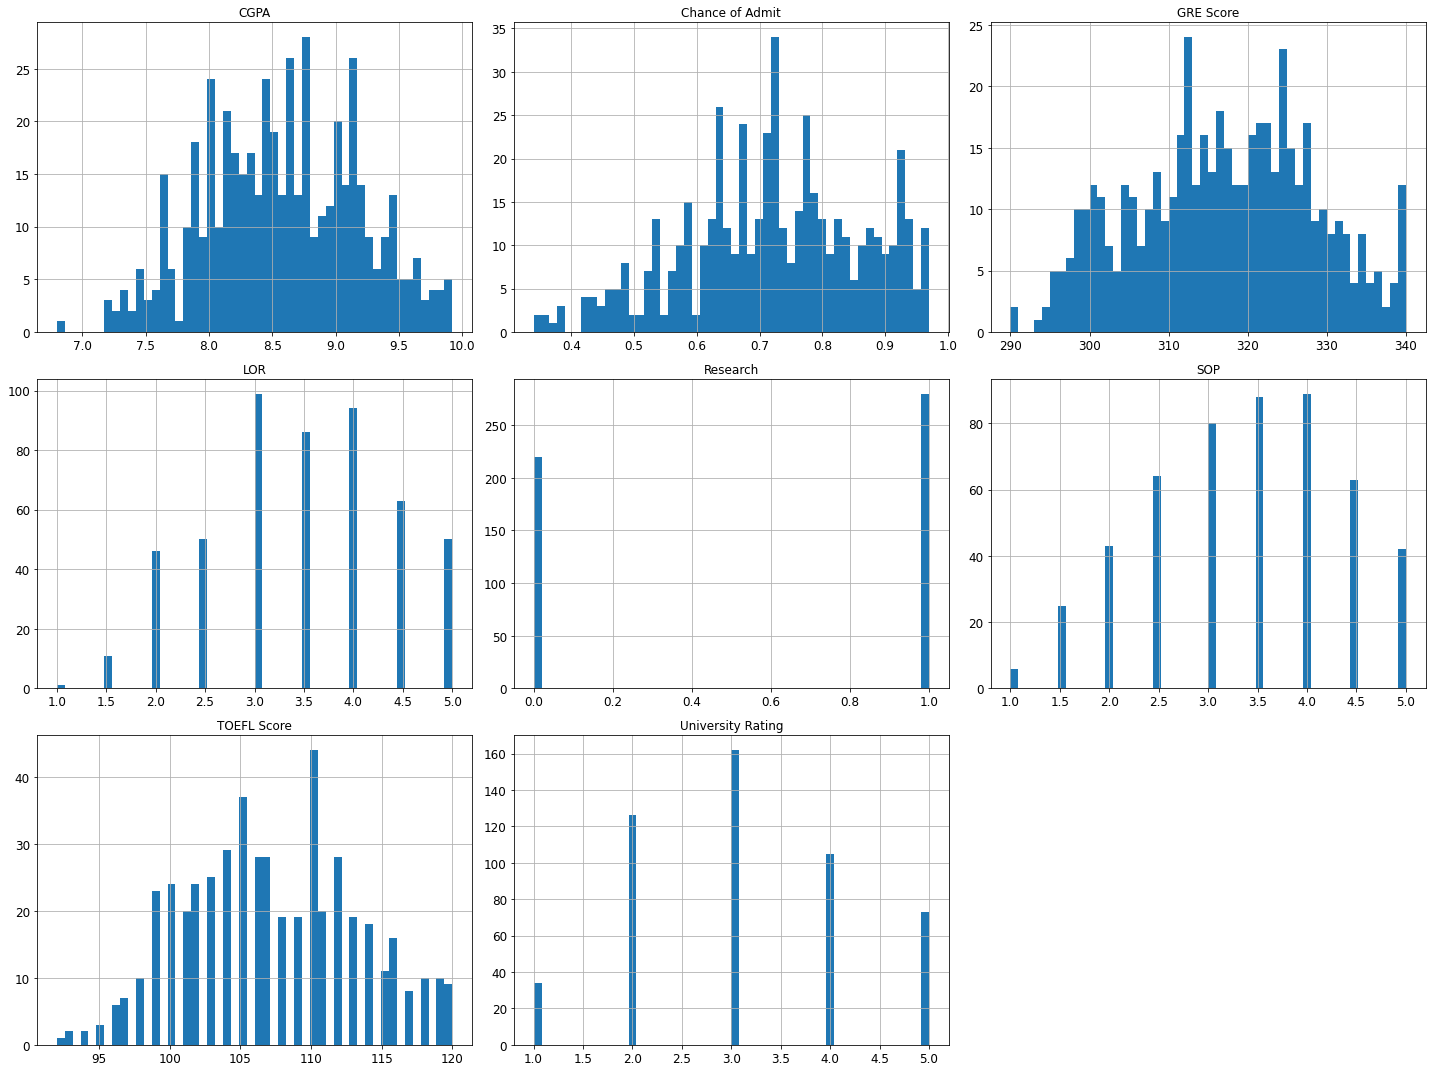

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
admission.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a test set

We will extract 20% of the data to be our test set.

In [10]:
import numpy as np
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(admission, test_size=0.2, random_state=42)

In [12]:
test_set.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,315.450000,106.620000,3.120000,3.370000,3.500000,8.559200,0.580000,0.712000
std,12.521799,6.039901,1.139555,1.011599,0.945484,0.621336,0.496045,0.143724
min,290.000000,93.000000,1.000000,1.000000,1.000000,7.340000,0.000000,0.390000
25%,304.750000,102.750000,2.000000,2.500000,3.000000,8.090000,0.000000,0.620000
50%,316.000000,106.000000,3.000000,3.500000,3.500000,8.540000,1.000000,0.710000
75%,326.000000,111.000000,4.000000,4.000000,4.000000,9.065000,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.800000,1.000000,0.960000


In [13]:
train_set.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000,0.724175
std,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588,0.140564
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000,0.637500
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000,0.730000
75%,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Discover and Visualize the Data

In [14]:
admission = train_set.copy()

In [15]:
admission.corr()["Chance of Admit"]

GRE Score            0.820509
TOEFL Score          0.789258
University Rating    0.679056
SOP                  0.680343
LOR                  0.626950
CGPA                 0.878106
Research             0.544058
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

From the following we observe that the chance of admission grows directly with the CGPAs of the students. 

Saving figure better_visualization_plot


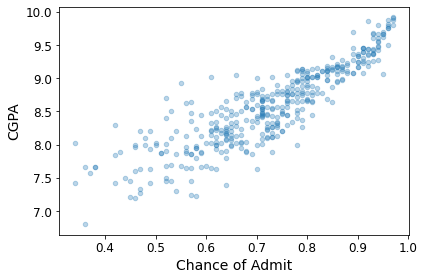

In [16]:
admission.plot(kind="scatter", x="Chance of Admit", y="CGPA", alpha=0.3)
save_fig("better_visualization_plot")

Also the Chance of Admission and the TOEFL score are directly proportional.

Saving figure better_visualization_plot


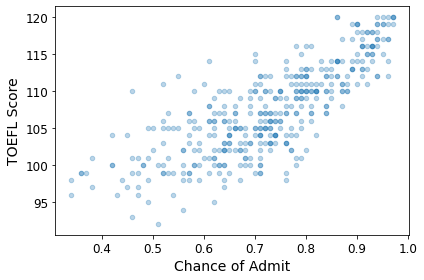

In [17]:
admission.plot(kind="scatter", x="Chance of Admit", y="TOEFL Score", alpha=0.3)
save_fig("better_visualization_plot")

From the next plot we determine that the students who do research are also the ones who have good CGPAs. There are also cases of good CGPAs with no research and bad CGPAs with research but those cases are isolated.

Saving figure better_visualization_plot


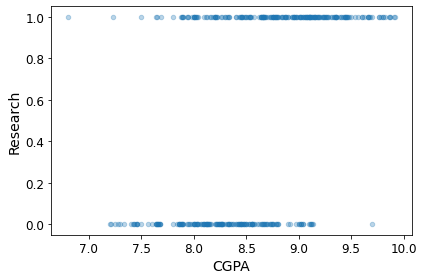

In [18]:
admission.plot(kind="scatter", x="CGPA", y="Research", alpha=0.3)
save_fig("better_visualization_plot")

Saving figure better_visualization_plot


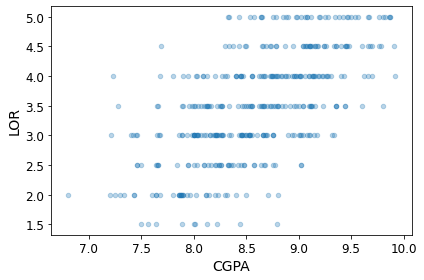

In [19]:
admission.plot(kind="scatter", x="CGPA", y="LOR", alpha=0.3)
save_fig("better_visualization_plot")

From the correlation matrix we observe that the most correlated attribute with the chance of admission is the CGPA. Also GRE and TOEFL scores are highly correlated with good chances of admission.

In [20]:
corr_matrix = admission.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.817746,0.643475,0.617428,0.506241,0.824167,0.576955,0.820509
TOEFL Score,0.817746,1.000000,0.649494,0.645565,0.518661,0.797548,0.466876,0.789258
University Rating,0.643475,0.649494,1.000000,0.715971,0.597848,0.701813,0.435260,0.679056
SOP,0.617428,0.645565,0.715971,1.000000,0.654382,0.714200,0.396742,0.680343
LOR,0.506241,0.518661,0.597848,0.654382,1.000000,0.626748,0.327614,0.626950
CGPA,0.824167,0.797548,0.701813,0.714200,0.626748,1.000000,0.493553,0.878106
Research,0.576955,0.466876,0.435260,0.396742,0.327614,0.493553,1.000000,0.544058
Chance of Admit,0.820509,0.789258,0.679056,0.680343,0.626950,0.878106,0.544058,1.000000


In [21]:
corr_matrix["Chance of Admit"].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.878106
GRE Score            0.820509
TOEFL Score          0.789258
SOP                  0.680343
University Rating    0.679056
LOR                  0.626950
Research             0.544058
Name: Chance of Admit, dtype: float64

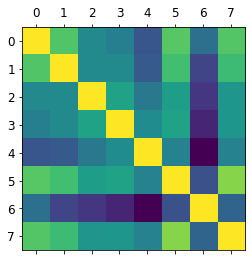

In [22]:
import matplotlib.pyplot as plt

plt.matshow(corr_matrix)
plt.show()

Saving figure scatter_matrix_plot


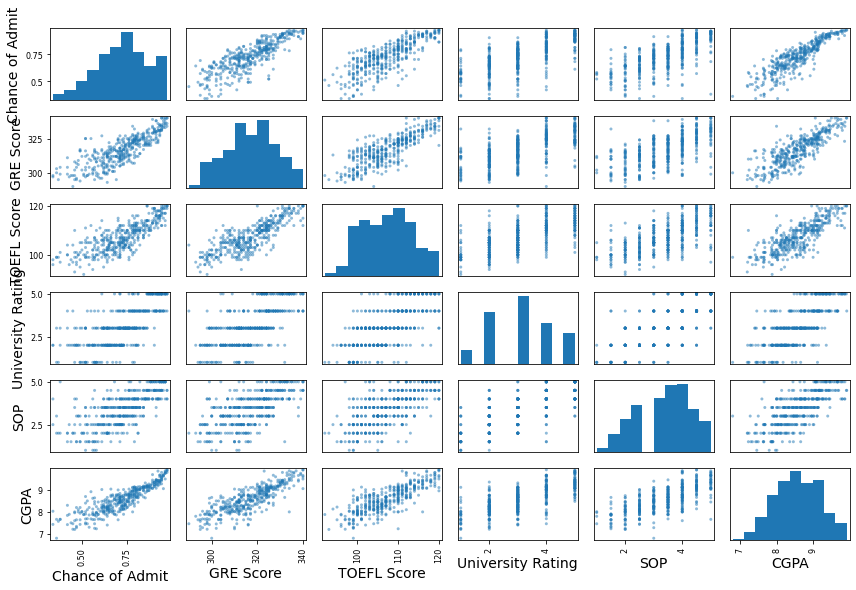

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["Chance of Admit", "GRE Score", "TOEFL Score",
              "University Rating", "SOP", "CGPA"]
scatter_matrix(admission[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [24]:
import seaborn as sns

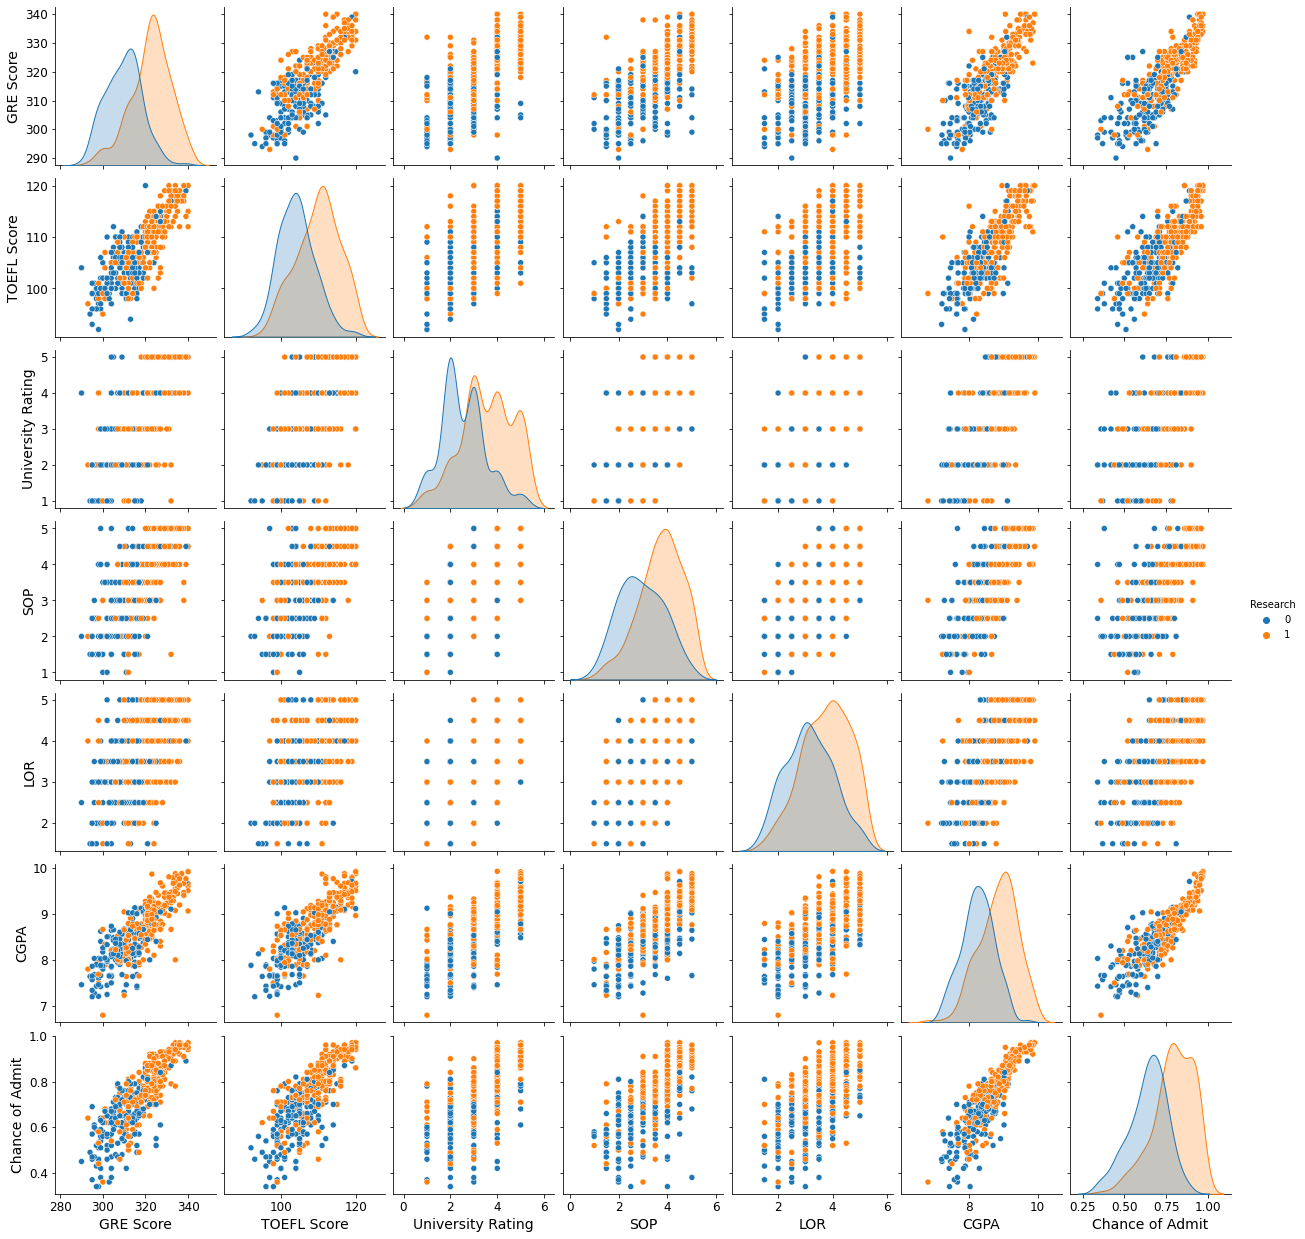

In [25]:
sns.pairplot(admission,hue='Research')

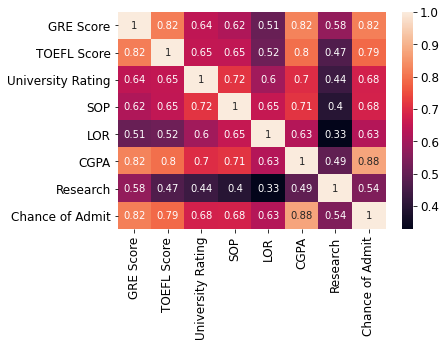

In [26]:
# correlation
corr_matrix = admission.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Text(0.5, 1.0, 'Count of University Rating')

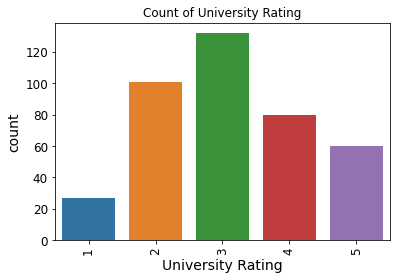

In [27]:
p=sns.countplot(x='University Rating',data=admission)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.title('Count of University Rating')

Text(0.5, 1.0, 'Count of Research')

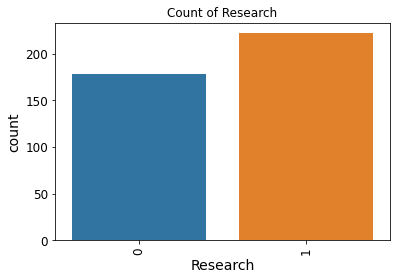

In [28]:
p=sns.countplot(x='Research',data=admission)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.title('Count of Research')

<AxesSubplot:xlabel='LOR', ylabel='count'>

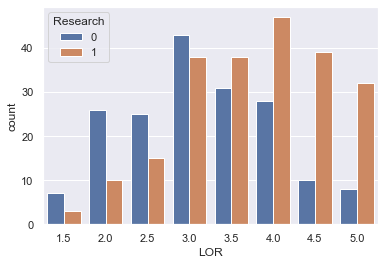

In [29]:
sns.set(style='darkgrid')
sns.countplot(x='LOR',hue='Research',data=admission)

<AxesSubplot:xlabel='LOR', ylabel='count'>

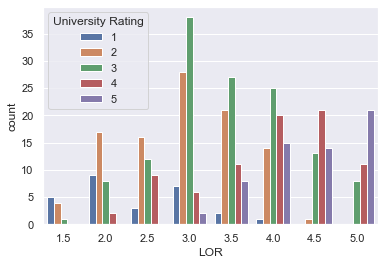

In [30]:
sns.set(style='darkgrid')
sns.countplot(x='LOR',hue='University Rating',data=admission)

# Prepare the Data for Machine Learning Algorithms

In [31]:
x_train = train_set.drop(["Chance of Admit"], axis=1) # drop labels for training set
y_train = train_set["Chance of Admit"].copy()

In [32]:
x_test = test_set.drop(["Chance of Admit"], axis=1) # drop labels for training set
y_test = test_set["Chance of Admit"].copy()

In [33]:
x_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000
std,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000
75%,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


### Data cleaning

There are no missing features.

In [34]:
train_set.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
test_set.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Handling Text and Categorical Attributes

The data set contains only numerical attributes.

### Custom transforms

Could not find any relevant combination of attributes.

### Feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler

# standard scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
x_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [38]:
x_train.shape

(400, 7)

# Select and Train a Model

In [41]:
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error

In the following, some models will be tried in order to determine which behaves better on the data set.

### Linear regression

Linear regression algorithm first takes the input values (X) and combines them using a weighted sum. At this sum a constant value is added, i.e. the bias term, and we obtain the response (Y). Linear regression algorithm will find the weights and the bias term which will give us the line that best fits the data. The best fit line is the one for which total prediction error is as small as possible. The error is the distance between the computed point to the regression line. The linear regression model prediction is:

<img src="admission_files/linearreg.png">

### Ridge regression

Ridge Regression is a regularized version of Linear Regression: a regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

### Decision tree regressor

A decision tree is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, the model breaks down the data by making a decision based on asking a series of questions.
Decision trees have an advantage that it is easy to understand, lesser data cleaning is required, non-linearity does not affect the model’s performance and the number of hyper-parameters to be tuned is almost null. However, it may have an over-fitting problem, which can be resolved using the Random Forest.

### Random Forest Regressor

The Random Forest Algorithm merges the output of multiple Decision Trees to generate the final output. It works by training many Decision Trees on random subsets of the features, then averaging out their predictions. The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features.

### Extra-Trees Regressor

When growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is
possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do). A forest of such extremely random trees is simply called an Extremely
Randomized Trees ensemble (or Extra-Trees for short). This trades more bias for a lower variance. It also makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.

### K Neighbors Regressor

K Nearest Neghbors regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. To do regression, we can take the mean or median of the neighbors, or we can solve a linear regression problem on the neighbors.

### Support Vector Regression

For SVM regression the trick is to reverse the objective of SVM classification: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

### AdaBoost Regressor

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique
used by AdaBoost (Adaptive Boost). The basic structure behind this can be a decision tree, but the dataset used for training is continuously adapted to force the model to focus on those samples that are mispredicted. 

### Gradient Boosting Regressor

Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit
the new predictor to the residual errors made by the previous predictor.

### Model evaluation

For evaluating the models the R-squared value was used. The value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variation in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’.

In [42]:
models = [["LinearRegression", LinearRegression()],
          ["RidgeRegression", Ridge(alpha=1.0)],
          ["DecisionTreeRegressor" , DecisionTreeRegressor()],
          ["RandomForestRegressor", RandomForestRegressor()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ["ExtraTreesRegressor", ExtraTreesRegressor()],
          ["SupportVectorRegression", SVR()],
          ["SupportVectorRegression_linear", SVR(kernel = 'linear')],
          ["HuberRegressor", HuberRegressor()],
          ["AdaBoostRegressor", AdaBoostRegressor()],
          ["GradientBoostingRegressor", GradientBoostingRegressor()]]

scores = []

for name,model in models:
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    scores.append(accuracy)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f"The r2 score for {name} model is {accuracy*100}")
    print(f"The Root mean Squared error for {name} model is {rmse}")
    print("-"*70)

The r2 score for LinearRegression model is 81.88432567829629
The Root mean Squared error for LinearRegression model is 0.0608658804157831
----------------------------------------------------------------------
The r2 score for RidgeRegression model is 81.87885396675398
The Root mean Squared error for RidgeRegression model is 0.060875071776539315
----------------------------------------------------------------------
The r2 score for DecisionTreeRegressor model is 61.69193154034232
The Root mean Squared error for DecisionTreeRegressor model is 0.08850988645343524
----------------------------------------------------------------------
The r2 score for RandomForestRegressor model is 78.78473887530562
The Root mean Squared error for RandomForestRegressor model is 0.06586744947240633
----------------------------------------------------------------------
The r2 score for KNeighborsRegressor :  model is 78.02092909535453
The Root mean Squared error for KNeighborsRegressor :  model is 0.067042672

In [43]:
score_algorithms=['Linear Regression',
                  'Ridge Regression',
                  'Decision Tree Regressor', 
                  'Random Forest Regressor',
                  'K Neighbors Regressor',
                  'Extra Trees Regressor',
                  'Support Vector Regression',
                  'Support Vector Regression - linear',
                  'HuberRegressor',
                  'AdaBoostRegressor',
                  'GradientBoostingRegressor']


Text(0.5, 0, 'Score')

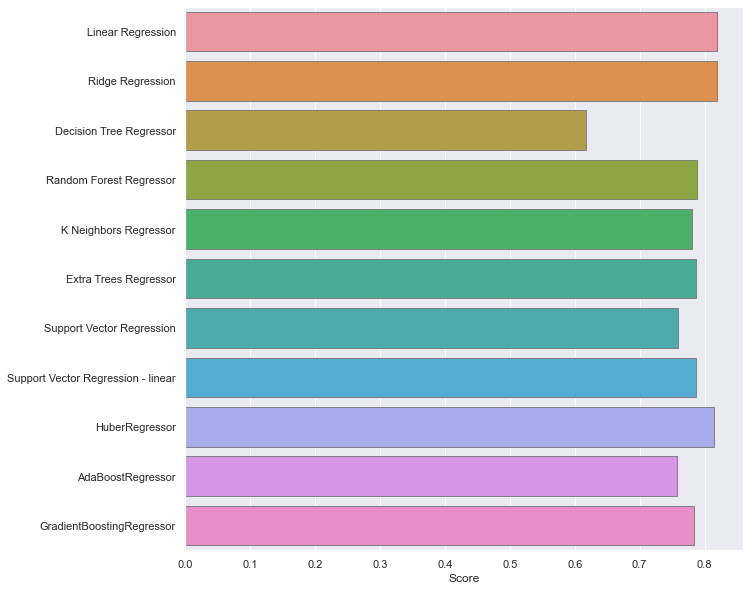

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x=scores,y=score_algorithms,edgecolor="0.5")
plt.xlabel('Score')

## Observations

1. Linear regression behaves best on our data set.

2. The difference between the Decision Tree and the Random Forest is considerable. We can observe that applying decision forests multiple times using a random forest results in a 19% increase.

3. Extra Trees is slightly better than Random Forest, as it was inteded by the algorithm.

4. All the algorithms except the Decision Tree have accuracies grater than 70%.

5. Huber Regressor and Bayesian Ridge also obtain great results of over 80%.

6. Support Vector regression obtains better results with a linear kernel than with a rbf kernel (the default one).

7. The Ridge regression has almost equal results with the linear regression no matter the value of alpha, resulting that the linear regression still gives the best results.

# Hyperparameter tuning using Randomized Search

We previously saw that the ridge regression obtained the great results in terms of accuracy and we will try to perform hyperparameter tuning on it in order to determine wether we can do better.

In [45]:
from sklearn.model_selection import GridSearchCV

ridge_parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}

ridgeRegressor = Ridge()
grid = GridSearchCV(ridgeRegressor, ridge_parameters , cv = 10)
grid.fit(x_train,y_train)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best accuracy is : 
{'alpha': 1}
The best accuracy achieved after parameter tuning via grid search is :  0.8050580411878114


The results obtained after tuning are unfortunately worse than the untuned ones. The accuracy drops 1%.